In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import fuzzywuzzy
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', None)

In [2]:
from fuzzywuzzy import fuzz

def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

In [3]:
df_fpl = pd.read_csv(r'C:\Users\aaron\prem_league_analytics\data\fantasy_prem.csv')
df_fpl['year'] = '19/20'

In [4]:
path = r'C:\Users\aaron\prem_league_analytics\data\ml_analysis\ '

df_fifa = pd.read_csv(path+'fifa.csv')
df_fifa = df_fifa.drop(columns=['Unnamed: 0'])
df_trans = pd.read_csv(path+'trans.csv')
df_trans = df_trans.drop(columns=['Unnamed: 0'])

In [5]:
df_trans_gk = df_trans[df_trans['position'] == 'Goalkeeper']
df_trans_gk.head()

,name,age,height,position,current club,date,left,joined,mv,year,short_name
0,Ederson,26,188.0,Goalkeeper,Manchester City,"Jul 1, 2015",Rio Ave FC,Benfica,1000000.0,15/16,NaN
1,Scott Carson,34,188.0,Goalkeeper,Manchester City,"Jul 1, 2015",Wigan,Derby,2000000.0,15/16,S. Carson
7,Caoimhin Kelleher,20,188.0,Goalkeeper,Liverpool FC,NaN,NaN,NaN,0.0,15/16,C. Kelleher
8,Andy Lonergan,35,193.0,Goalkeeper,Liverpool FC,"Jul 1, 2015",Bolton,Fulham,500000.0,15/16,A. Lonergan
22,Sergio Romero,32,192.0,Goalkeeper,Manchester United,"Jul 27, 2015",Sampdoria,Man Utd,5000000.0,15/16,S. Romero


In [6]:
df_fifa_gk = df_fifa[df_fifa['player_positions'] == 'GK']
df_fifa_gk.head()

,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,player_positions.1,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
4,Alisson,89,Liverpool,58000000,155000,GK,19/20,91,GK,Right,3,3,1,GK,1.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89
5,De Gea,89,Manchester United,56000000,205000,GK,19/20,90,GK,Right,4,3,1,GK,1.0,2011-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,"Flair, Second Wind, Flair Passes",17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92
9,Ederson,88,Manchester City,54500000,185000,GK,19/20,91,GK,Left,2,3,1,GK,31.0,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,"Leadership, Swerve Pass, Acrobatic Clearance",20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88
12,H. Lloris,88,Tottenham Hotspur,36000000,150000,GK,19/20,88,GK,Left,4,1,1,GK,1.0,2012-08-31,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0,82.0,68.0,91.0,63.0,84.0,"Swerve Pass, Acrobatic Clearance",13,10,10,50,11,10,11,10,50,34,65,62,55,86,54,51,74,41,43,14,31,27,10,30,40,65,29,10,18,89,82,68,84,91
28,Kepa,84,Chelsea,31000000,92000,GK,19/20,89,GK,Right,1,4,1,GK,1.0,2018-08-08,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,84.0,82.0,86.0,85.0,33.0,80.0,"Flair, Flair Passes",25,11,18,51,18,10,25,19,53,16,34,33,41,78,39,65,71,37,51,14,18,21,15,57,24,63,19,18,16,84,82,86,80,85


In [7]:
df_fifa_gk.head()

,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,player_positions.1,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
4,Alisson,89,Liverpool,58000000,155000,GK,19/20,91,GK,Right,3,3,1,GK,1.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89
5,De Gea,89,Manchester United,56000000,205000,GK,19/20,90,GK,Right,4,3,1,GK,1.0,2011-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,"Flair, Second Wind, Flair Passes",17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92
9,Ederson,88,Manchester City,54500000,185000,GK,19/20,91,GK,Left,2,3,1,GK,31.0,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,"Leadership, Swerve Pass, Acrobatic Clearance",20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88
12,H. Lloris,88,Tottenham Hotspur,36000000,150000,GK,19/20,88,GK,Left,4,1,1,GK,1.0,2012-08-31,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0,82.0,68.0,91.0,63.0,84.0,"Swerve Pass, Acrobatic Clearance",13,10,10,50,11,10,11,10,50,34,65,62,55,86,54,51,74,41,43,14,31,27,10,30,40,65,29,10,18,89,82,68,84,91
28,Kepa,84,Chelsea,31000000,92000,GK,19/20,89,GK,Right,1,4,1,GK,1.0,2018-08-08,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,84.0,82.0,86.0,85.0,33.0,80.0,"Flair, Flair Passes",25,11,18,51,18,10,25,19,53,16,34,33,41,78,39,65,71,37,51,14,18,21,15,57,24,63,19,18,16,84,82,86,80,85


In [8]:
df_trans_gk = df_trans_gk.drop(columns=['short_name'])
df_trans_gk.head()

,name,age,height,position,current club,date,left,joined,mv,year
0,Ederson,26,188.0,Goalkeeper,Manchester City,"Jul 1, 2015",Rio Ave FC,Benfica,1000000.0,15/16
1,Scott Carson,34,188.0,Goalkeeper,Manchester City,"Jul 1, 2015",Wigan,Derby,2000000.0,15/16
7,Caoimhin Kelleher,20,188.0,Goalkeeper,Liverpool FC,NaN,NaN,NaN,0.0,15/16
8,Andy Lonergan,35,193.0,Goalkeeper,Liverpool FC,"Jul 1, 2015",Bolton,Fulham,500000.0,15/16
22,Sergio Romero,32,192.0,Goalkeeper,Manchester United,"Jul 27, 2015",Sampdoria,Man Utd,5000000.0,15/16


In [9]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in df_trans_gk.name:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, df_fifa_gk.short_name, 60)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"trans_name" : name})
    dict_.update({"match_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table_gk = pd.DataFrame(dict_list)
# Display results
#merge_table_gk.head()

In [10]:
merge_table_gk = merge_table_gk[merge_table_gk.score != -1]
merge_table_gk.head()

,trans_name,match_name,score
0,Ederson,Ederson,100
1,Scott Carson,S. Carson,76
2,Caoimhin Kelleher,C. Kelleher,71
3,Andy Lonergan,A. Lonergan,83
4,Sergio Romero,Sergio Rico,75


In [11]:
df_match_gk = pd.merge(df_fifa_gk, merge_table_gk,  how='right', left_on=['short_name'], right_on = ['match_name'])
df_match_gk.drop_duplicates(subset=['short_name', 'year'])
df_match_gk.head()

,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,player_positions.1,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,trans_name,match_name,score
0,Alisson,89,Liverpool,58000000,155000,GK,19/20,91,GK,Right,3,3,1,GK,1.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,Alisson,Alisson,100
1,Alisson,85,Liverpool,36500000,115000,GK,18/19,90,GK,Right,3,3,1,GK,13.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,82.0,81.0,85.0,88.0,49.0,83.0,"Puncher, GK Long Throw, Rushes Out Of Goal",17,13,19,45,20,27,19,18,44,30,54,45,40,83,37,21,52,32,78,14,27,11,13,66,23,65,15,19,16,82,81,85,83,88,Alisson,Alisson,100
2,Alisson,89,Liverpool,58000000,155000,GK,19/20,91,GK,Right,3,3,1,GK,1.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,Alisson,Alisson,100
3,Alisson,85,Liverpool,36500000,115000,GK,18/19,90,GK,Right,3,3,1,GK,13.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,82.0,81.0,85.0,88.0,49.0,83.0,"Puncher, GK Long Throw, Rushes Out Of Goal",17,13,19,45,20,27,19,18,44,30,54,45,40,83,37,21,52,32,78,14,27,11,13,66,23,65,15,19,16,82,81,85,83,88,Alisson,Alisson,100
4,Ederson,88,Manchester City,54500000,185000,GK,19/20,91,GK,Left,2,3,1,GK,31.0,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,"Leadership, Swerve Pass, Acrobatic Clearance",20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,Ederson,Ederson,100


In [12]:
df_merged_gk = pd.merge(df_match_gk, df_trans_gk,  how='left', left_on=['match_name', 'year'], right_on = ['name', 'year'])
#df_merged_gk = df_merged_gk.drop_duplicates(subset=['short_name', 'year'])
df_merged_gk['short_name'].astype(str)
df_merged_gk.rename(columns={'short_name':'fifa_name'} , inplace=True)
df_merged_gk.head()

,fifa_name,overall,club,value_eur,wage_eur,player_positions,year,potential,player_positions.1,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined_x,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,trans_name,match_name,score,name,age,height,position,current club,date,left,joined_y,mv
0,Alisson,89,Liverpool,58000000,155000,GK,19/20,91,GK,Right,3,3,1,GK,1.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,Alisson,Alisson,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alisson,85,Liverpool,36500000,115000,GK,18/19,90,GK,Right,3,3,1,GK,13.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,82.0,81.0,85.0,88.0,49.0,83.0,"Puncher, GK Long Throw, Rushes Out Of Goal",17,13,19,45,20,27,19,18,44,30,54,45,40,83,37,21,52,32,78,14,27,11,13,66,23,65,15,19,16,82,81,85,83,88,Alisson,Alisson,100,Alisson,27.0,191.0,Goalkeeper,Liverpool FC,"Jul 19, 2018",AS Roma,Liverpool,60000000.0
2,Alisson,89,Liverpool,58000000,155000,GK,19/20,91,GK,Right,3,3,1,GK,1.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,Alisson,Alisson,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alisson,85,Liverpool,36500000,115000,GK,18/19,90,GK,Right,3,3,1,GK,13.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,82.0,81.0,85.0,88.0,49.0,83.0,"Puncher, GK Long Throw, Rushes Out Of Goal",17,13,19,45,20,27,19,18,44,30,54,45,40,83,37,21,52,32,78,14,27,11,13,66,23,65,15,19,16,82,81,85,83,88,Alisson,Alisson,100,Alisson,27.0,191.0,Goalkeeper,Liverpool FC,"Jul 19, 2018",AS Roma,Liverpool,60000000.0
4,Ederson,88,Manchester City,54500000,185000,GK,19/20,91,GK,Left,2,3,1,GK,31.0,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,"Leadership, Swerve Pass, Acrobatic Clearance",20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,Ederson,Ederson,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_merged_gk.to_csv('gk_stats.csv')

In [14]:
order_overall = df_merged_gk.groupby(by=['club'])['overall'].median().sort_values(ascending=False).index

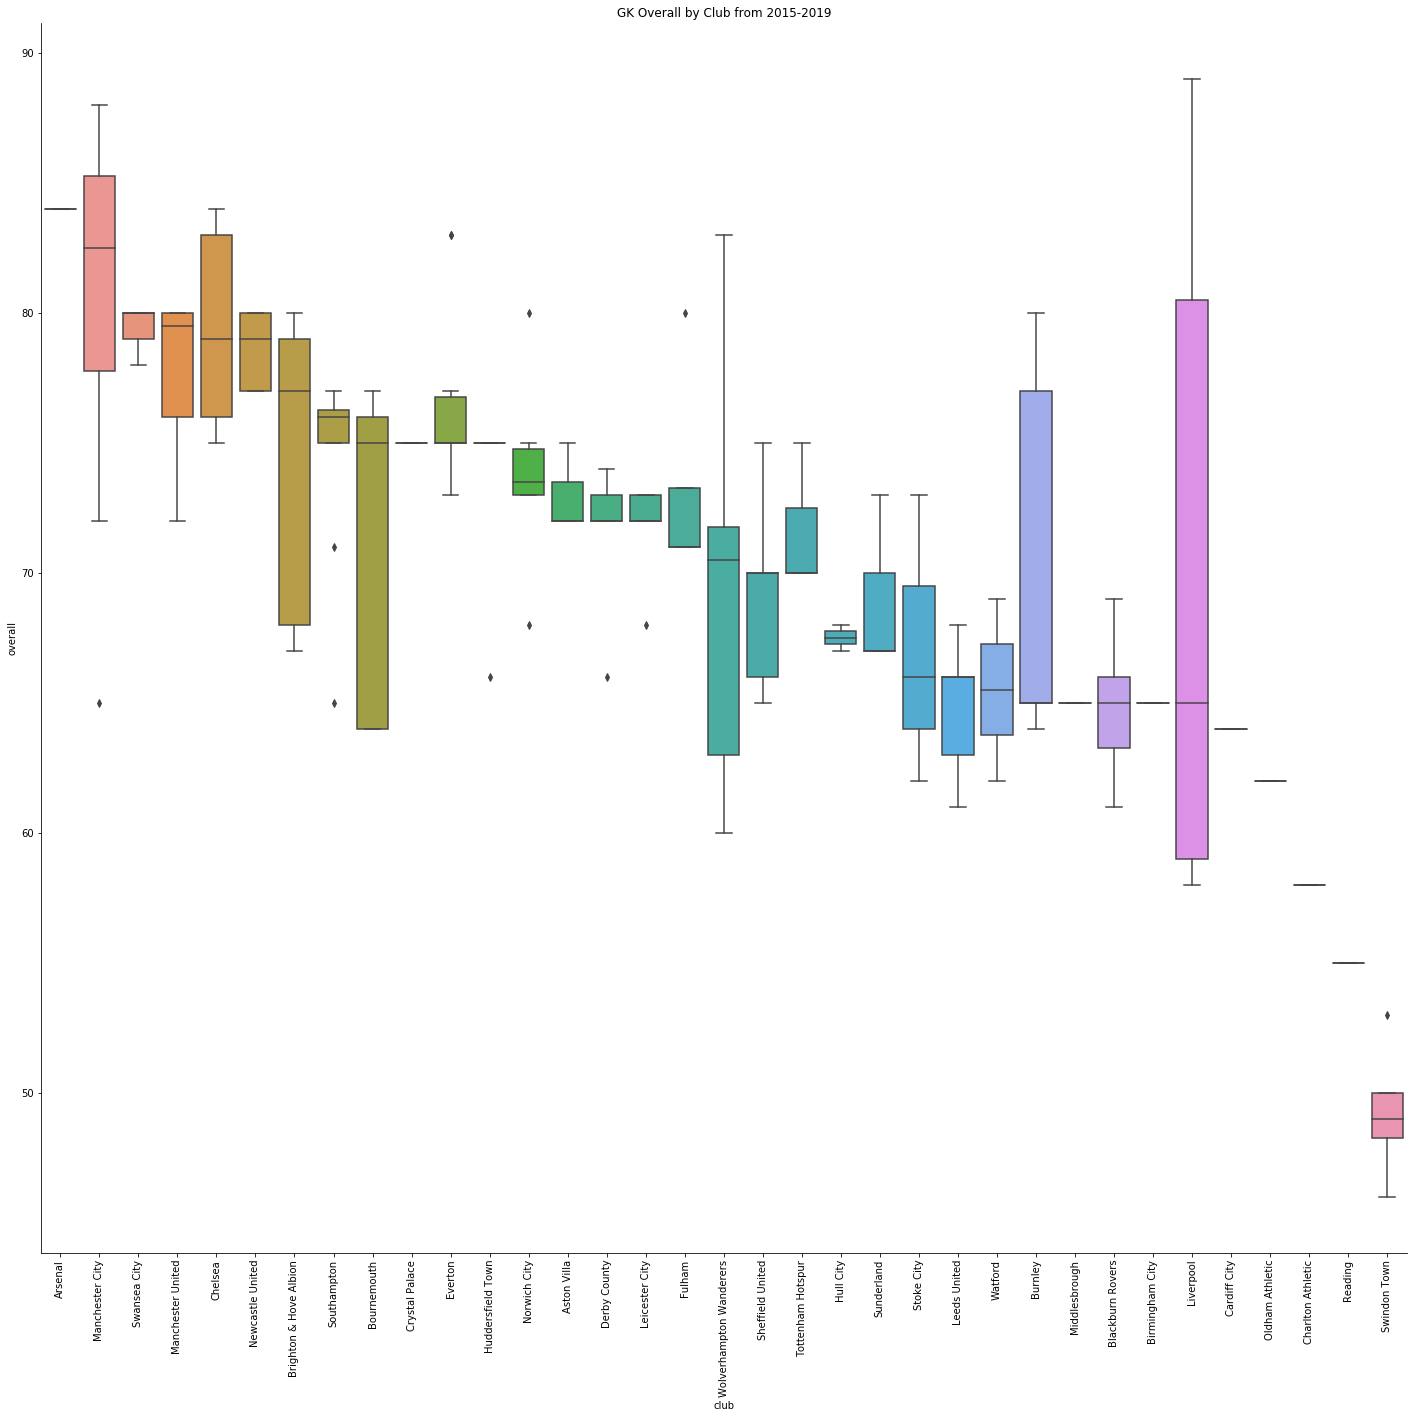

In [15]:
#Historical trends from 
ax=sns.catplot(x="club", y="overall", kind="box", order=order_overall, data=df_merged_gk)
ax.fig.set_size_inches(25,20)
ax.set_xticklabels(rotation=90)
plt.title('GK Overall by Club from 2015-2019')
plt.show()